# Logistic Regression on Titanic Dataset - Practice

Reference : https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

### 1. Importing Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style = "white") # background for seaborn plots as setted as white
sns.set(style = "whitegrid", color_codes = True)



In [19]:
sns.set(style = "dark") # background for seaborn plots as setted as white
sns.set(style = "whitegrid", color_codes = True)

In [3]:
## Reading train data
train_df = pd.read_csv("train.csv")

## Reading test data
test_df = pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
print("The number of samples into the train data is {}. ".format(train_df.shape[0]))

The number of samples into the train data is 891. 


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print("The number of samples in the test data is {}." .format(test_df.shape[0]))

The number of samples in the test data is 418.


## Observation :

        There is no target variable in test dataset thus we have to predict it

## 2. Data Processing and Missing Value Assessment

In [9]:
## Checking for missing values in train data

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.1 Handling Missing values in Age

In [10]:
## missing value in age feature in percentage

print("Percentage of missing value in age feature is %.2f%%" %((train_df["Age"].isnull().sum()/ train_df.shape[0]) * 100))

Percentage of missing value in age feature is 19.87%


## observation :

    - Almost 20% of values are missing in age features. analysing the values of age column.

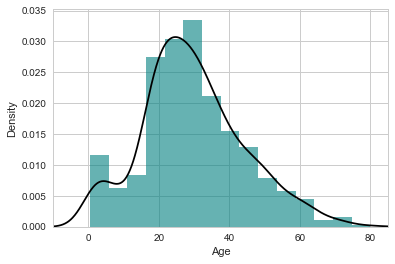

In [12]:
ax = train_df["Age"].hist(bins = 15, density = True, stacked = True, color = 'teal', alpha = 0.6)
train_df["Age"].plot(kind = "density", color = "Black")
ax.set(xlabel = "Age")
plt.xlim(-10, 85)
plt.show()

## Observation : 
    
   - Here the age is right skewed, using the mean might give us biased results by filling in ages that are older than desired.
   - Thus to do this we use median to impute the missing values
    

In [13]:
## Mean age
print("The mean age of AGE Feature is %.2f" %(train_df["Age"].mean(skipna = True)))

## Median Age
print("The median age of AGE Feature is %.2f " %(train_df["Age"].median(skipna = True)))

The mean age of AGE Feature is 29.70
The median age of AGE Feature is 28.00 


### 2.2 Handling Missing Values in Cabin 

In [15]:
## Percentage value of missing values in cabin feature

print("percent of missing values in cabin is %.2f%%" %((train_df["Cabin"].isnull().sum()/train_df.shape[0])*100))

percent of missing values in cabin is 77.10%


## Observation :

    - Almost 77% of information is not missing, thus imputing the variable will cause improper results.
    - Thus leaving this variable for training

## 2.3 Handling Missing Values in Embarked feature

In [16]:
## percentage of missing values

print("Missing values of Embarked %.2f%%" %((train_df["Embarked"].isnull().sum()/train_df.shape[0]) * 100))

Missing values of Embarked 0.22%


### Observation :
    -There are only 2 values (.22%) is not present thus we are filling with most occured option i.e. port

Boarded passangers grouped by port by embarkation (C = Cherbourg, Q = Queenstown, S = Southampton ):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


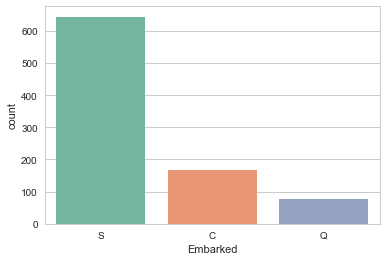

In [20]:
print("Boarded passangers grouped by port by embarkation (C = Cherbourg, Q = Queenstown, S = Southampton ):")
print(train_df["Embarked"].value_counts())

sns.countplot(x = "Embarked", data = train_df, palette = "Set2")
plt.show()

In [22]:
print("The most common boarding port of embarkation is %s." %train_df["Embarked"].value_counts().idxmax())

The most common boarding port of embarkation is S.


### Observation :

    - as S is mostly occured thus filling the missing values with S

In [23]:
### Filling the data

train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna = True), inplace = True)
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(), inplace = True)
train_data.drop('Cabin', axis = 1, inplace = True)

In [24]:
## cHecking after processing the missing values

train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
train_data.head()
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'TravelAlone'],
      dtype='object')

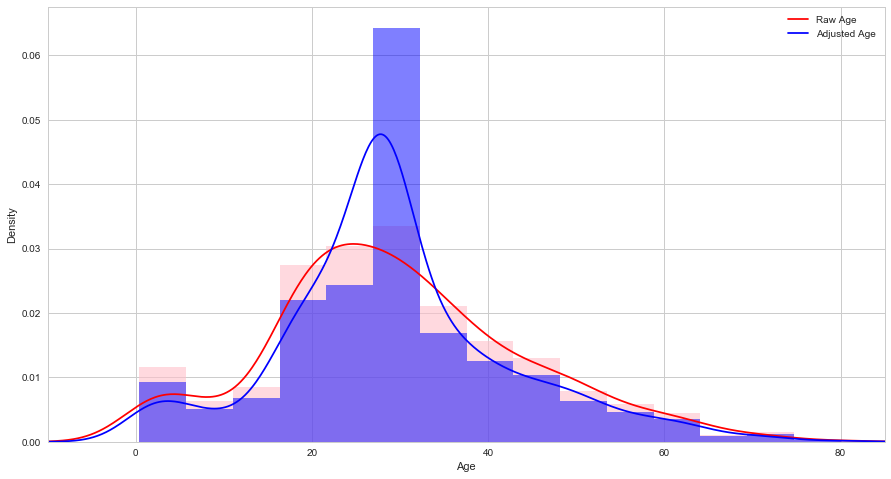

In [26]:
plt.figure(figsize = (15, 8))

ax = train_df["Age"].hist(bins = 15, density = True , stacked = True, color = "pink", alpha = 0.6)
train_df["Age"].plot(kind = "density", color = "red")

ax = train_data["Age"].hist(bins = 15, density = True, stacked = True, color = "blue", alpha = 0.5)
train_data["Age"].plot(kind = "density", color = "blue")

ax.legend(["Raw Age", "Adjusted Age"])
ax.set(xlabel = "Age")
plt.xlim(-10, 85)
plt.show()


In [30]:
## creating categorical variable

train_data["TravelAlone"] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)
train_data.drop('SibSp', axis = 1, inplace = True)
train_data.drop('Parch', axis = 1, inplace = True)


KeyError: 'SibSp'

In [31]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

KeyError: 'SibSp'

In [32]:
## Create Categorical variables and drop some variables

training = pd.get_dummies(train_data, columns = ["Pclass", "Embarked", "Sex"])
training.drop("Sex_female", axis = 1, inplace = True)
training.drop("PassengerId", axis = 1, inplace = True)
training.drop("Name", axis = 1, inplace = True)
training.drop("Ticket", axis = 1, inplace = True)

final_train = training
final_train.head()

,Survived,Age,Parch,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,0,8.0500,1,0,0,1,0,0,1,1


In [33]:
## applying imputation fpr test data

test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna = True), inplace = True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna = True), inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)




In [46]:


testing = pd.get_dummies(test_data, columns = ["Pclass", "Embarked", "Sex"])
testing.drop("Sex_female", axis = 1, inplace = True)
testing.drop("PassengerId", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)
testing.drop("Ticket", axis = 1, inplace = True)

final_test = testing
final_test.head()


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [41]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
train_df["Parch"].values

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 4, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,

## Exploratory Data Analysis

In [ ]:
plt.figure(figsize = (15, 8))
